# similar to ridge_and _lasso.ipynb but for decision tree

In [24]:
# Import necessary libraries and files

import sys
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# our own files

import utilities.misc as misc
import utilities.metrics as mtr
import utilities.ml_functions as ml


In [25]:

df = pd.read_csv('clean_weather/valid_data/m2_valid.csv')
X1 = df.iloc[:, 5] # wind speed
X2 = df.iloc[:, 3] # atmospheric pressure
X = np.column_stack((X1, X2))
Y = df.iloc[:, 7] # wave height

In [26]:
m2_loc = 'clean_weather/valid_data/m2_valid.csv'
Xm2, Ym2 = misc.make_3d_dataframe(data_loc=m2_loc, col_x1=5, col_x2=3, col_y=7)

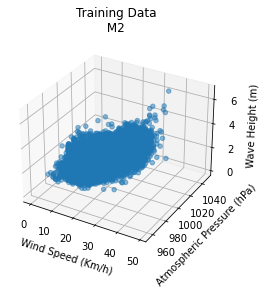

In [27]:
misc.plot_training_data(input_features=Xm2, target_feature=Ym2, dataset_id='M2', x_label='Wind Speed (Km/h)', y_label='Atmospheric Pressure (hPa)', z_label='Wave Height (m)')


In [37]:
# generate test data
# max_poly = 1 # any higher order of data makes training take a long time. Training data is large
# test_data = misc.genarate_test_values(x_upper=60, x_lower=0, y_upper=940, y_lower=1060, poly_level = max_poly)
# plt.scatter(test_data[:,1],test_data[:,2])
x_upper=60
x_lower=0
y_upper=940
y_lower=1060

test_data = []
x_grid = np.linspace(x_lower,x_upper, num = 20)
y_grid = np.linspace(y_lower,y_upper, num = 20)
for i in x_grid:
    for j in y_grid:
        test_data.append([i,j])
test_data = np.array(test_data)
test_data


array([[   0.        , 1060.        ],
       [   0.        , 1053.68421053],
       [   0.        , 1047.36842105],
       [   0.        , 1041.05263158],
       [   0.        , 1034.73684211],
       [   0.        , 1028.42105263],
       [   0.        , 1022.10526316],
       [   0.        , 1015.78947368],
       [   0.        , 1009.47368421],
       [   0.        , 1003.15789474],
       [   0.        ,  996.84210526],
       [   0.        ,  990.52631579],
       [   0.        ,  984.21052632],
       [   0.        ,  977.89473684],
       [   0.        ,  971.57894737],
       [   0.        ,  965.26315789],
       [   0.        ,  958.94736842],
       [   0.        ,  952.63157895],
       [   0.        ,  946.31578947],
       [   0.        ,  940.        ],
       [   3.15789474, 1060.        ],
       [   3.15789474, 1053.68421053],
       [   3.15789474, 1047.36842105],
       [   3.15789474, 1041.05263158],
       [   3.15789474, 1034.73684211],
       [   3.15789474, 10

IndexError: index 2 is out of bounds for axis 1 with size 2

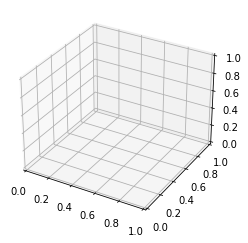

In [36]:
model = [ml.train_decision_tree(X,Y)]
predictions = ml.generate_predictions(model_array=model, test_data= test_data)

misc.plot_predictions(training_data=X,target_feature=Y,test_data=test_data, predictions=preds, t = "predictions")